<a href="https://colab.research.google.com/github/Kethan1712/GEN-AI-TASK-2/blob/main/Task_2_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random

# Define feedback samples for each sentiment category
feedback_samples = {
    "positive": [
        "The flight attendants were very friendly and helpful.",
        "Smooth check-in and a comfortable flight.",
        "Excellent service, will definitely fly again!",
        "The food was surprisingly good and the seats were comfy.",
        "On-time departure and arrival, great experience overall."
    ],
    "neutral": [
        "The flight was okay, nothing special.",
        "Average service, not too bad.",
        "It was just a regular flight experience.",
        "Nothing stood out, but no major issues either.",
        "Everything went as expected, pretty standard."
    ],
    "negative": [
        "The flight was delayed and staff were rude.",
        "Terrible food and cramped seating.",
        "Customer service was unhelpful and slow.",
        "Luggage was lost and the flight was overbooked.",
        "Worst flying experience I've had in years."
    ]
}

# Function to generate dataset
def generate_airline_feedback_dataset(n_samples):
    data = []
    for _ in range(n_samples):
        sentiment = random.choice(list(feedback_samples.keys()))
        text = random.choice(feedback_samples[sentiment])
        data.append({"feedback_text": text, "sentiment_label": sentiment})
    return pd.DataFrame(data)

# Generate datasets
train_df = generate_airline_feedback_dataset(300)
test_df = generate_airline_feedback_dataset(100)

# Save to CSV files
train_df.to_csv("airline_feedback_train.csv", index=False)
test_df.to_csv("airline_feedback_test.csv", index=False)

print("✅ Synthetic airline feedback datasets generated successfully!")
print("➡️ airline_feedback_train.csv (300 samples)")
print("➡️ airline_feedback_test.csv (100 samples)")


✅ Synthetic airline feedback datasets generated successfully!
➡️ airline_feedback_train.csv (300 samples)
➡️ airline_feedback_test.csv (100 samples)


Classification Report:

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        23
     neutral       1.00      1.00      1.00        44
    positive       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Accuracy: 1.00


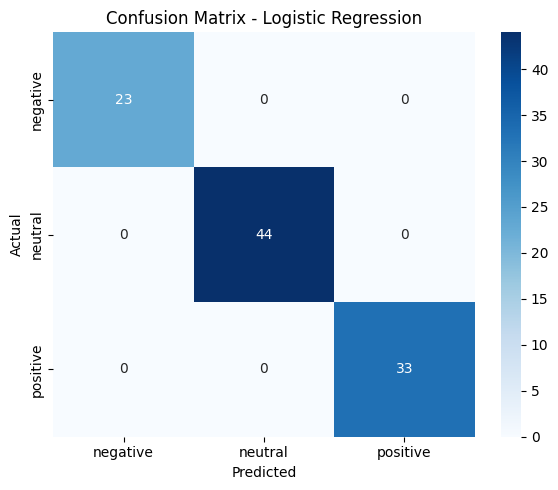

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data
train_df = pd.read_csv("airline_feedback_train.csv")
test_df = pd.read_csv("airline_feedback_test.csv")

# Preprocessing function (no NLTK)
def preprocess_text(text):
    text = text.lower()                             # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)            # Remove special characters and numbers
    text = " ".join(text.split())                   # Remove extra whitespace
    return text

# Apply preprocessing
train_df['clean_text'] = train_df['feedback_text'].apply(preprocess_text)
test_df['clean_text'] = test_df['feedback_text'].apply(preprocess_text)

# Encode sentiment labels
le = LabelEncoder()
train_labels = le.fit_transform(train_df['sentiment_label'])
test_labels = le.transform(test_df['sentiment_label'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')  # Built-in stopword removal
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, train_labels)

# Make predictions
predictions = model.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(test_labels, predictions, target_names=le.classes_))

accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
